In [13]:
# Check the number of .csv files
csv_files = [r"C:\Users\HP\Downloads\movie_data\movies.csv", r"C:\Users\HP\Downloads\movie_data\ratings.csv",r"C:\Users\HP\Downloads\movie_data\links.csv",r"C:\Users\HP\Downloads\movie_data\tags.csv"]
print(f'Number of CSV files: {len(csv_files)}')

Number of CSV files: 4


In [14]:
# Check the shape of the datasets
print(f'Shape of movies.csv: {movies.shape}')
print(f'Shape of ratings.csv: {ratings.shape}')

Shape of movies.csv: (9742, 3)
Shape of ratings.csv: (100836, 4)


In [15]:
unique_users = ratings['userId'].nunique()
print(f'Number of unique userId: {unique_users}')


Number of unique userId: 610


In [16]:
ratings_count = ratings.groupby('movieId').size().reset_index(name='counts')
max_ratings_movie = ratings_count[ratings_count['counts'] == ratings_count['counts'].max()]
max_ratings_movie_id = max_ratings_movie['movieId'].values[0]

# Merge with movies to get the name of the movie
max_rated_movie = movies[movies['movieId'] == max_ratings_movie_id]['title'].values[0]
print(f'Movie with maximum number of user ratings: {max_rated_movie}')

Movie with maximum number of user ratings: Forrest Gump (1994)


In [19]:
matrix_movie_id = movies.loc[movies['title'].str.contains('Matrix, The'), 'movieId'].iloc[0]
matrix_tags = tags.loc[tags['movieId'] == matrix_movie_id, 'tag'].drop_duplicates().to_numpy()
print(f'Unique tags for "The Matrix (1999)": {matrix_tags}')


Unique tags for "The Matrix (1999)": ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [20]:
t2_movie_id = movies.loc[movies['title'].str.contains('Terminator 2'), 'movieId'].iloc[0]
t2_ratings = ratings.loc[ratings['movieId'] == t2_movie_id, 'rating'].mean()
print(f'Average rating for "Terminator 2: Judgment Day (1991)": {t2_ratings}')


Average rating for "Terminator 2: Judgment Day (1991)": 3.970982142857143


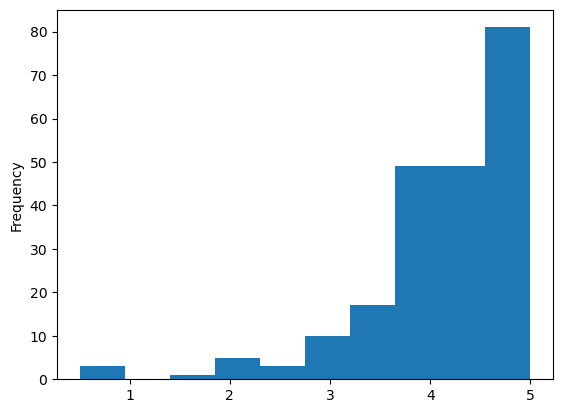

In [21]:
fight_club_id = movies.loc[movies['title'].str.contains('Fight Club'), 'movieId'].iloc[0]
fight_club_ratings = ratings.loc[ratings['movieId'] == fight_club_id, 'rating']
fight_club_distribution = fight_club_ratings.plot.hist(bins=10).get_figure()
fight_club_distribution.savefig('fight_club_distribution.png')


In [24]:
aggregated_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
aggregated_ratings.columns = ['rating_count', 'average_rating']
movies_with_high_ratings = aggregated_ratings[aggregated_ratings['rating_count'] > 50]
popular_movies = pd.merge(movies_with_high_ratings, movies, on='movieId')


In [30]:
most_popular_movie = popular_movies.loc[popular_movies['average_rating'].idxmax()]
print(f"Most popular movie based on average user ratings: {most_popular_movie['title']}")


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [32]:
top_5_movies = popular_movies.nlargest(5, 'rating_count')
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies[['title', 'rating_count']])


Top 5 popular movies based on the number of user ratings:
                                title  rating_count
61                Forrest Gump (1994)           329
53   Shawshank Redemption, The (1994)           317
49                Pulp Fiction (1994)           307
99   Silence of the Lambs, The (1991)           279
248                Matrix, The (1999)           278


In [33]:
import pandas as pd

# Load datasets
movies = pd.read_csv(r"C:\Users\HP\Downloads\movie_data\movies.csv")
ratings = pd.read_csv(r"C:\Users\HP\Downloads\movie_data\ratings.csv")
links = pd.read_csv(r"C:\Users\HP\Downloads\movie_data\links.csv")
tags = pd.read_csv(r"C:\Users\HP\Downloads\movie_data\tags.csv")

# Group by movieId and calculate rating statistics
rating_stats = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
rating_stats.columns = ['movieId', 'rating_count', 'rating_mean']

# Filter movies with more than 50 ratings
movies_over_50_ratings = rating_stats[rating_stats['rating_count'] > 50]

# Merge with movies and links datasets
movies_over_50_ratings = movies_over_50_ratings.merge(movies, on='movieId')
movies_over_50_ratings = movies_over_50_ratings.merge(links, on='movieId')

print(f"Number of movies with more than 50 ratings: {len(movies_over_50_ratings)}")


Number of movies with more than 50 ratings: 436


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the datasets
movies = pd.read_csv(r"C:\Users\HP\Downloads\movie_data\movies.csv")
ratings = pd.read_csv(r"C:\Users\HP\Downloads\movie_data\ratings.csv")
links = pd.read_csv(r"C:\Users\HP\Downloads\movie_data\links.csv")

# Group by movieId and calculate the number of ratings
ratings_grouped = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

# Filter movies with more than 50 ratings
filtered_movies_df = ratings_grouped[ratings_grouped['rating_count'] > 50]

# Merge with movies and links data
filtered_movies_df = filtered_movies_df.merge(movies, on='movieId')
filtered_movies_df = filtered_movies_df.merge(links, on='movieId')

# Function to fetch IMDb reviews
def fetch_imdb_reviews(imdb_id, max_reviews=10):
    review_list = []
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = soup.find_all('div', class_='text show-more__control', limit=max_reviews)
    for review in reviews:
        review_list.append(review.text.strip())
    return review_list

# Add a new column to store the reviews
filtered_movies_df['imdb_reviews'] = filtered_movies_df['imdbId'].apply(lambda x: fetch_imdb_reviews(str(x).zfill(7)))

# Display a few rows to confirm that reviews are being captured
print(filtered_movies_df[['movieId', 'title', 'imdb_reviews']].head())


In [ ]:
# Save the reviews to a CSV file
filtered_movies_df.to_csv(r"D:\hacathon\reviews.csv", index=False)

In [ ]:
# Filter for Sci-Fi movies
sci_fi_movies_df = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi')]

# Check the number of Sci-Fi movies with more than 50 ratings
print(f"Number of Sci-Fi movies with more than 50 ratings: {len(sci_fi_movies_df)}")